# Introduction to Reinforcement Learning
## Open AI Gym with A2C and PyGame

### First, some primary references:

This notebook makes use of the Open AI Gym Environment
* https://gym.openai.com/docs/
* https://openai.com/blog/baselines-acktr-a2c/

A2C is an Actor Critic Model

*A2C is a synchronous, deterministic variant of Asynchronous Advantage Actor Critic (A3C) which we’ve found gives equal performance [to ACKTR]*

Open AI has a Gym that registers the reinforcement learning environment (the game)
* Some of the Open AI Framework depends on loading the environment from the Open AI Gym registry
* A custom pip module has been created so that the gym can register the pygame environment module.  If the model couldn't be loaded from the registry, some of the Open AI classes didn't work as expected.
* https://towardsdatascience.com/beginners-guide-to-custom-environments-in-openai-s-gym-989371673952

The notebook borrows heavily from the Open AI stable baselines3 tutorial:
* https://colab.research.google.com/github/araffin/rl-tutorial-jnrr19/blob/master/1_getting_started.ipynb

The notebook also includes code based on PyGame tutorials:
* https://opensource.com/article/17/12/game-python-add-a-player (parts 3-5)
* Similar to above, assume that the code has been taken from the tutorials.  Images are different and rewards are changed, but the tutorial was the baseline and modifications were made on top.

### Description


This notebook uses a simple PyGame with the Open AI Learning model A2C, which is one of the few that handles Discrete input


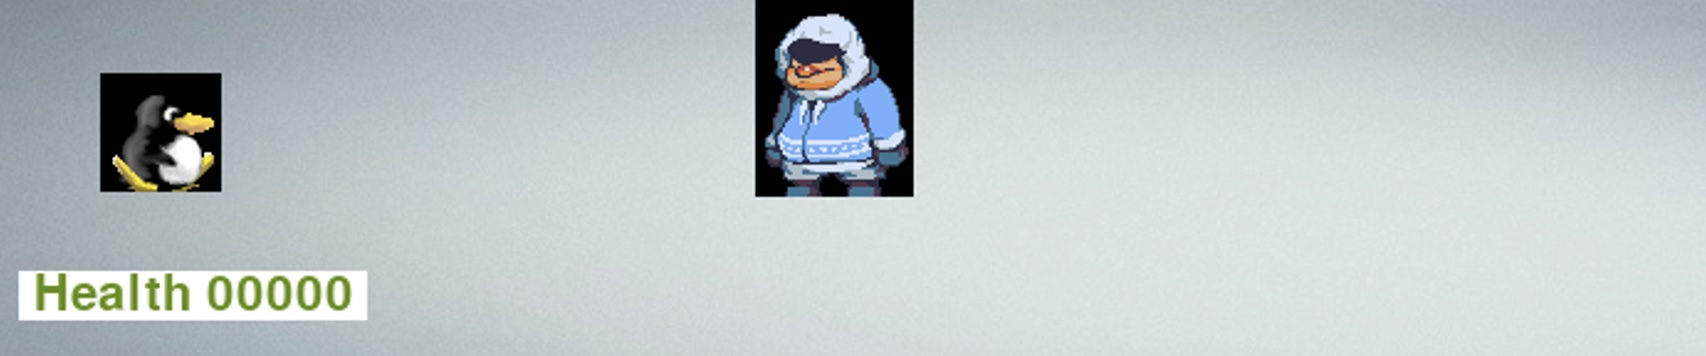



How the game works:
* 1 player/agent (penguin)
* 1 "enemy" (person)
* movement goes along an X axis
* The player is rewarded for each movement (left or right)
* If the player collides with the enemy, it gets a penalty
* If the player is near the enemy (without colliding) it gets higher rewards
* If the player is just moving, it gets a reward

Open AI A2C will input the PyGame image output (a numpy array)

Note that while the game versions may differ slightly across the project notebooks, they are conceptually the same.  The TensorFlow environment version is different in the observations it outputs, which align to Tensors of the TensorFlow API


## PIP installs

Below this is conditional to reduce unnecessary imports.  To run
set 
```
run_pip=True
```

In [ ]:
run_pip = True
if run_pip:
  !pip install tf-agents
  !pip install opencv-python 
  !pip install pillow
  !pip install pygame
  !pip install --upgrade tensorflow-probability
  !pip install ray
  !pip install tensorboard
  !pip install tensorflow-gpu #(which gives you tensorflow-gpu and tensorboard)
  !pip install stable_baselines3
  !pip install lz4

     |████████████████████████████████| 1.2MB 7.7MB/s 
     |████████████████████████████████| 4.8MB 27.9MB/s 
  Found existing installation: tensorflow-probability 0.12.1
    Uninstalling tensorflow-probability-0.12.1:
      Successfully uninstalled tensorflow-probability-0.12.1
     |████████████████████████████████| 11.8MB 8.3MB/s 
Requirement already up-to-date: tensorflow-probability in /usr/local/lib/python3.7/dist-packages (0.12.2)
     |████████████████████████████████| 49.4MB 105kB/s 
     |████████████████████████████████| 133kB 39.1MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 10.1MB 33.2MB/s 
     |████████████████████████████████| 3.1MB 40.8MB/s 
     |████████████████████████████████| 1.0MB 44.6MB/s 
     |████████████████████████████████| 1.3MB 40.2MB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
    

     |████████████████████████████████| 454.3MB 22kB/s 
     |████████████████████████████████| 153kB 7.9MB/s 
     |████████████████████████████████| 1.8MB 9.8MB/s 


## Imports


In [ ]:
import imageio
import numpy as np 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from IPython import display

from io import StringIO
import pygame
import cv2
import time
import PIL.Image
import random
import PIL.Image as Image
import gym
from gym import Env, spaces


import os
from google.colab import output


font = cv2.FONT_HERSHEY_COMPLEX_SMALL 


pygame 2.0.1 (SDL 2.0.14, Python 3.7.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import abc
import tensorflow as tf
import numpy as np
from tensorflow import TensorShape, TensorSpec

from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.trajectories import time_step as ts
from tf_agents.specs import BoundedArraySpec

from tf_agents.agents.dqn import dqn_agent
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import sequential
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.specs import tensor_spec
from tf_agents.utils import common



from gym import Env
from gym.spaces import Discrete, Box


tf.compat.v1.enable_v2_behavior()

## Google Drive For Files
### This is used for images and saving models


In [ ]:
image_dir = 'images'
working_dir = 'MyDrive'
drive_dir = '/content/drive'
model_dir = 'models'
output_dir = 'output'

In [ ]:
from google.colab import drive
drive.mount(drive_dir)  # Do this once only

mounted_drive = f'{drive_dir}/{working_dir}'
os.chdir(mounted_drive)


Mounted at /content/drive


### Known Issue: PyGame file system dependencies

The game has dependencies on the installation of image files and PIP module files
* The notebook working directory needs to be set in the image file directory when running the game.  Otherwise the game can't find its images.
* PIP module needs to be copied to Google Drive for the Colab notebook to find it and do the PIP install


The image and pip tar files can be found in the git repo directory "installed_tars".  Copy them up to the google drive and untar them.  **Make sure to change the working directory to the images directory after the pip module is installed.**

## PIP Install Custom PyGame Gym Env

The code for the Open AI Gym Env is located in the git repository under notebooks/pip-module

Per the [Open AI Repository](https://github.com/openai/gym) 


The core gym interface is Env, which is the unified environment interface. There is no interface for agents; that part is left to you. The following are the Env methods you should know:

* reset(self): Reset the environment's state. Returns observation.
* step(self, action): Step the environment by one timestep. Returns observation, reward, done, info.
* render(self, mode='human'): Render one frame of the environment. The default mode will do something human friendly, such as pop up a window.

(For this project, the default mode just returns the numpy array for the "human" mode)


* Untar the pip module on google drive
* Run command to install the module

In [ ]:

os.chdir(f'{mounted_drive}')
!tar -xvf my-custom-gym.tar
os.chdir(f'{mounted_drive}/my-custom-gym')
!pip install -e .
import gym
import my_custom_gym


my-custom-gym/README.md
my-custom-gym/__init__.py
my-custom-gym/my_custom_gym/
my-custom-gym/my_custom_gym/__init__.py
my-custom-gym/my_custom_gym/__pycache__/
my-custom-gym/my_custom_gym/envs/
my-custom-gym/my_custom_gym/envs/images/
my-custom-gym/my_custom_gym/envs/__init__.py
my-custom-gym/my_custom_gym/envs/__pycache__/
my-custom-gym/my_custom_gym/envs/foo_env.py
my-custom-gym/my_custom_gym/envs/my_py_game_env.py
my-custom-gym/my_custom_gym/envs/__pycache__/__init__.cpython-38.pyc
my-custom-gym/my_custom_gym/envs/__pycache__/foo_env.cpython-38.pyc
my-custom-gym/my_custom_gym/envs/__pycache__/my_py_game_env.cpython-38.pyc
my-custom-gym/my_custom_gym/envs/images/._enemy.png
my-custom-gym/my_custom_gym/envs/images/enemy.png
my-custom-gym/my_custom_gym/envs/images/hero4.png
my-custom-gym/my_custom_gym/envs/images/stage.jpg
my-custom-gym/my_custom_gym/envs/images/hero3.png
my-custom-gym/my_custom_gym/envs/images/hero2.png
my-custom-gym/my_custom_gym/envs/images/._hero1.png
my-custom-gym

## Import new Gym Env and set back working dir

In [ ]:

import gym

from stable_baselines3 import A2C
from stable_baselines3.a2c import MlpPolicy
from stable_baselines3.common.cmd_util import make_vec_env

# https://colab.research.google.com/github/araffin/rl-tutorial-jnrr19/blob/sb3/1_getting_started.ipynb#scrollTo=R7tKaBFrTR0a

from stable_baselines3.common.monitor import Monitor



/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/cmd_util.py:6: FutureWarning: Module ``common.cmd_util`` has been renamed to ``common.env_util`` and will be removed in the future.
  "Module ``common.cmd_util`` has been renamed to ``common.env_util`` and will be removed in the future.", FutureWarning


In [ ]:
# set SDL to use the dummy NULL video driver, 
#   so it doesn't need a windowing system.
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [ ]:
os.chdir(f'{mounted_drive}/{image_dir}')
env = gym.make('my-pygame-env-v0') # name of custom pygame environment module


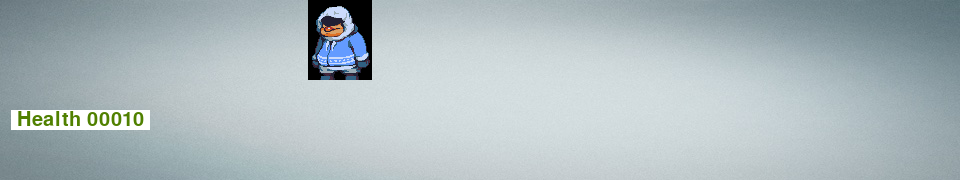

In [ ]:
reset_output = env.reset()
PIL.Image.fromarray(env.render(mode='rgb_array'))

## PyGame States, Actions, and Rewards

Reinforcement Learning uses **states**, **actions** and **rewards** to train the model
* States are snapshots of the pertinent data at the time
* Since we are conserving on memory, only 3 parameters are being passed to the model from the observation  
* Actions are passed into the Environment through the step method
* Rewards are passed back through the observation as reward
* TensorFlow timesteps are made up of **(state, reward, step type, and discount)**
#### Step/Action values

**Active Values**
* 0 = Left
* 1 = Right


Check to see that the environment/game can run 100 steps or 5 seconds, whatever comes first.  Show the end state with the rendered image.

Box(0, 255, (180, 960, 3), uint8)
Discrete(3)
0
average 3.25


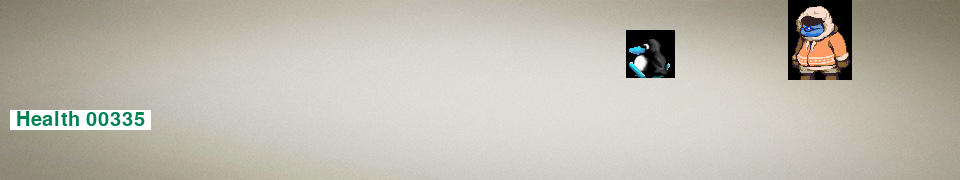

In [ ]:
print(env.observation_space)
print(env.action_space)
print(env.action_space.sample())

n_steps = 100
total_rewards = 0
counter = 0
for step in range(0,100):
    obs, reward, done, info = env.step(env.action_space.sample())  
    total_rewards += reward
    counter += 1
    
avg_reward = total_rewards/counter
print(f'average {avg_reward}')
      #break
cv2_imshow(obs)

Instantiate model.  Note that each Open AI model has its own specific MlpPolicy class

In [ ]:


model = A2C(MlpPolicy, env, verbose=1)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


Add a monitor to the environment to capture any logging

In [ ]:
# https://colab.research.google.com/github/Stable-Baselines-Team/rl-colab-notebooks/blob/master/monitor_training.ipynb#scrollTo=kmxIq5UeC3Nj
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, log_dir)

## Get Model Baseline

The method below comes straight from the Stable Baselines3 tutorial.  We will evaluate the model with a number of episodes *before we train it to get our baseline*

In [ ]:
# Test the trained agent
def evaluate(model, num_episodes=100):
    """
    Evaluate a RL agent
    :param model: (BaseRLModel object) the RL Agent
    :param num_episodes: (int) number of episodes to evaluate it
    :return: (float) Mean reward for the last num_episodes
    """
    # This function will only work for a single Environment
    env = model.get_env()
    all_episode_rewards = []
    for i in range(num_episodes):
        episode_rewards = []
        done = False
        obs = env.reset()
        while not done:
            # _states are only useful when using LSTM policies
            action, _states = model.predict(obs)
            # here, action, rewards and dones are arrays
            # because we are using vectorized env
            obs, reward, done, info = env.step(action)
            
            episode_rewards.append(reward)

        all_episode_rewards.append(sum(episode_rewards))

    mean_episode_reward = np.mean(all_episode_rewards)
    print("Mean reward:", mean_episode_reward, "Num episodes:", num_episodes)

    return mean_episode_reward

In [ ]:
mean_reward_before_train = evaluate(model, num_episodes=100)

time 513144
time 1024684
Mean reward: -4531.1 Num episodes: 100


Now run the evaluate policy for further diagnostics.  Due to memory limitations, only 30 episodes are run

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=30)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:-45.00 +/- 71.41


## Train A2C model and save it

Here we use only 25000 steps.  This takes hours.  A number of stats are output.  

For Reinforcement Learning, our main metric will be checking the average scores on the games.  For this particular exercise, we will not be charting the stats below.

In [ ]:
model.learn(total_timesteps=20000)
model.save("a2c_pygame_model")

------------------------------------
| time/                 |          |
|    fps                | 68       |
|    iterations         | 100      |
|    time_elapsed       | 7        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.992   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 18.6     |
|    value_loss         | 454      |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 695       |
|    ep_rew_mean        | -7.84e+03 |
| time/                 |           |
|    fps                | 68        |
|    iterations         | 200       |
|    time_elapsed       | 14        |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.952    |
|    explained_variance | 0         |
|    learning_rate      | 

## Evaluate Trained Model

Get the average reward per 100 episodes

Here, we're reusing a function that was taken from the tutorial; however it would be better if it were renamed.  The results at this point are from an already trained model.

I won't rename it now, since it takes too long to run.

In [ ]:
mean_reward_before_train = evaluate(model, num_episodes=100)

time 1863243
time 2374688
Mean reward: 11544.9 Num episodes: 100


Below create a gif to see 350 steps and save it to a file.

In [ ]:
def create_gif(model, gif_name):
  images = []
  obs = model.env.reset()
  img = model.env.render(mode='rgb_array')
  for i in range(350):
      images.append(img)
      action, _ = model.predict(obs)
      obs, _, _ ,_ = model.env.step(action)
      img = model.env.render(mode='rgb_array')

  imageio.mimsave(f'{gif_name}.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)
  images = []


In [ ]:

create_gif(model, 'after_a2c_pygame')